In [53]:
%config InlineBackend.figure_format = 'retina'

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import pandas_profiling
from sklearn.neural_network import MLPClassifier

def generateDataset(size, ndim=4):

    bias=1

    x = np.linspace(-2*np.pi, +2*np.pi, size)

    timeSeries=4*np.sin(x)+bias

    features=np.zeros((size, ndim))

    labels=np.zeros((size, 1))

    for i in range(size):

        for j in range(ndim):

            features[i,j]=np.random.random_sample()*10

        if np.linalg.norm(features[i])>8:

            labels[i]=1

    return timeSeries, features, labels







In [2]:
timeSeries, features, labels = generateDataset(1000)

# First question

Visualize the data, either using pandas ploting capability or matplotlib.

In [3]:
df = pd.DataFrame(
    features,
    columns=['dim1', 'dim2', 'dim3', 'dim4']
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A94133EF0>,
      dtype=object)

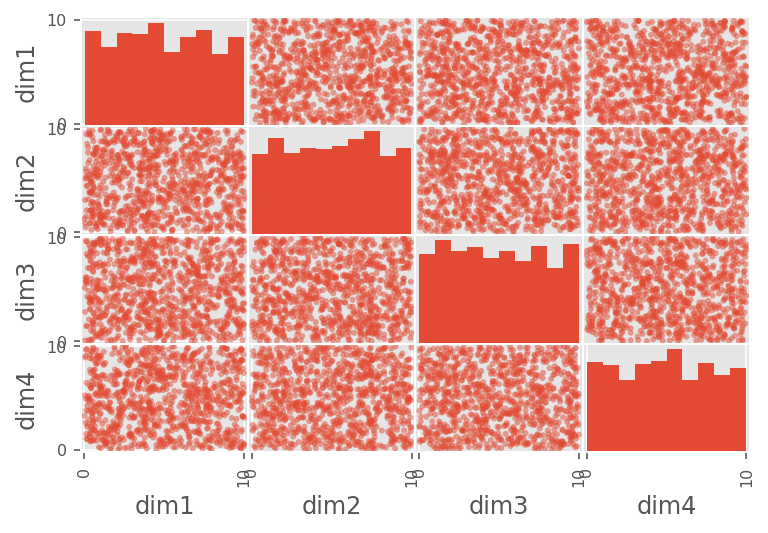

In [4]:
pd.plotting.scatter_matrix(df)

# Second question

Preprocess the data so it is suited for ML analysis.

Specifically it is desired to have Train and Validation Datasets with 75/25 weight.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25)

0.75
0.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A99C94AC8>,
      dtype=object)

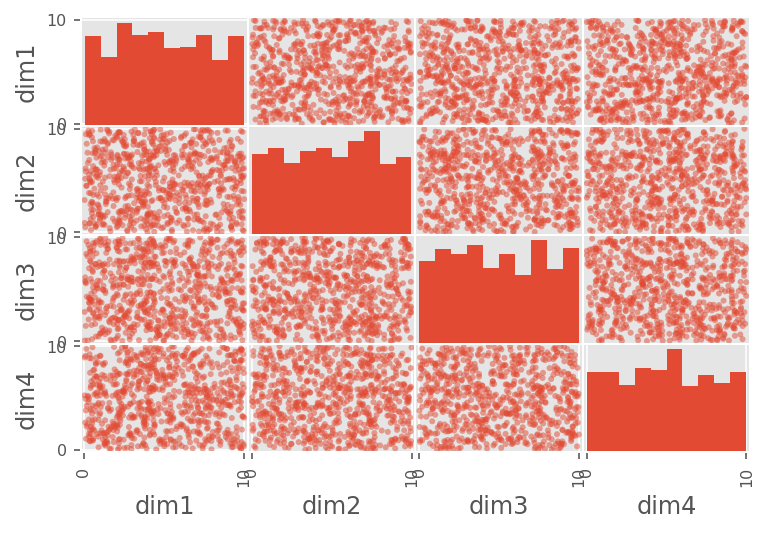

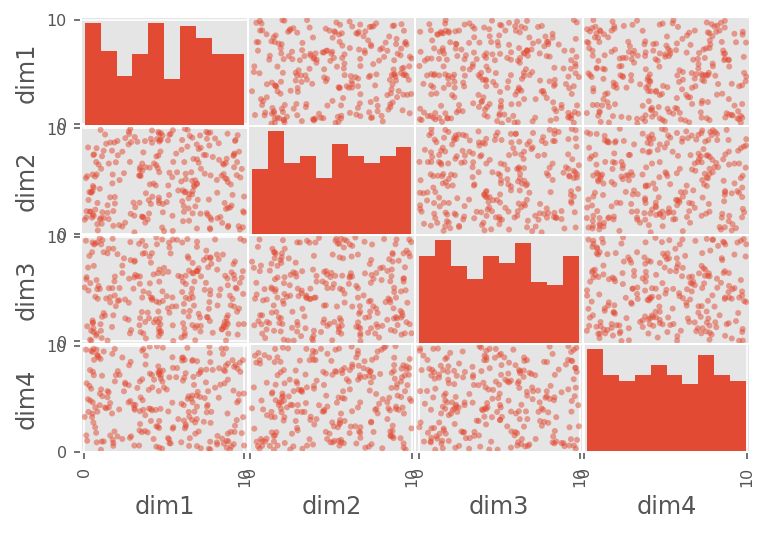

In [6]:
print(X_train.size/df.size)
print(X_test.size/df.size)
pd.plotting.scatter_matrix(X_train)
pd.plotting.scatter_matrix(X_test)


# Third question 

Using Principal Analysis Decomposition, reduce the dimensionality of the features to ndim=2. 

Then apply an MLP classifier on the new features and the original labels 

MLP characteristics are 3 hidden layers of 25 cells and sigmoid activation. 

Evaluate the model

In [7]:
pca = PCA(n_components = 2)
pca.fit(df)
print(pca.singular_values_)  
print(pca.explained_variance_ratio_)

redX_train = pca.transform(X_train)
redX_test = pca.transform(X_test)

[93.17685369 90.31071058]
[0.26393843 0.24795055]


In [51]:

mlp = MLPClassifier(hidden_layer_sizes=(25, 25, 25), activation='logistic')
mlp.fit(X_train,np.ravel(y_train))





MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [52]:
mlp.score(X_test,y_test)

0.868

# Fourth question

Create a model to predict future steps of the timeSeries

Please only use scikitLearn methods even though sub-optimal

Justify the model selection and accuracy

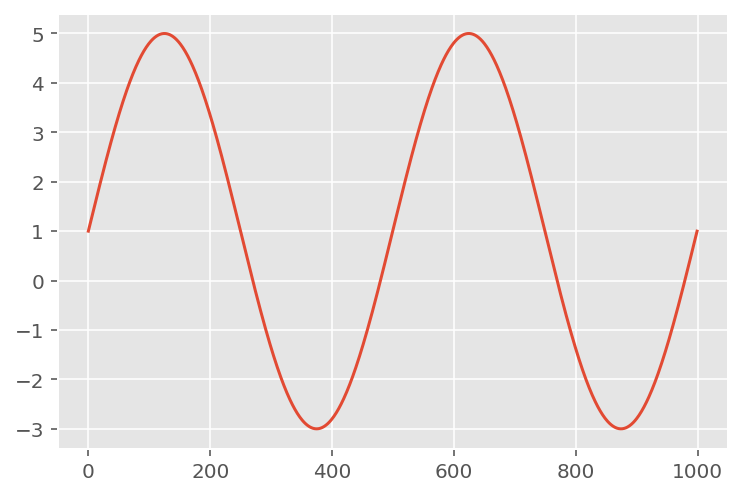

In [12]:
import matplotlib as mpl

mpl.pyplot.plot(timeSeries)

In [13]:
from sklearn.svm import SVR

In [14]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


In [15]:
svr_rbf.fit(np.arange(timeSeries.size).reshape(-1,1),timeSeries)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

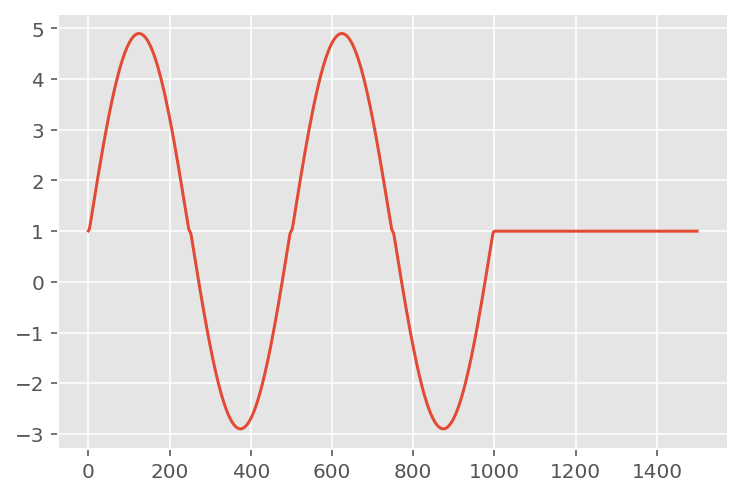

In [16]:
mpl.pyplot.plot(svr_rbf.predict(np.arange(timeSeries.size+500).reshape(-1,1)))

In [17]:
from sklearn.linear_model import ElasticNet

In [19]:
regr = ElasticNet(random_state=0)
regr.fit(np.arange(timeSeries.size).reshape(-1,1),timeSeries)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

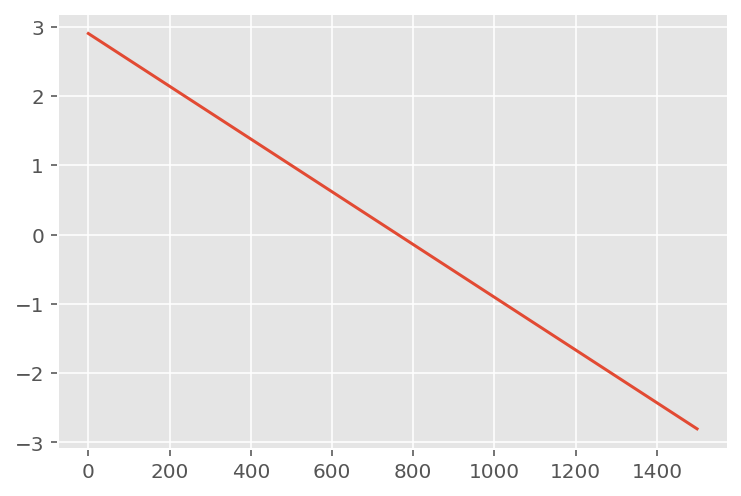

In [20]:
mpl.pyplot.plot(regr.predict(np.arange(timeSeries.size+500).reshape(-1,1)))

In [21]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.564937e-62
  overwrite_a=True).T


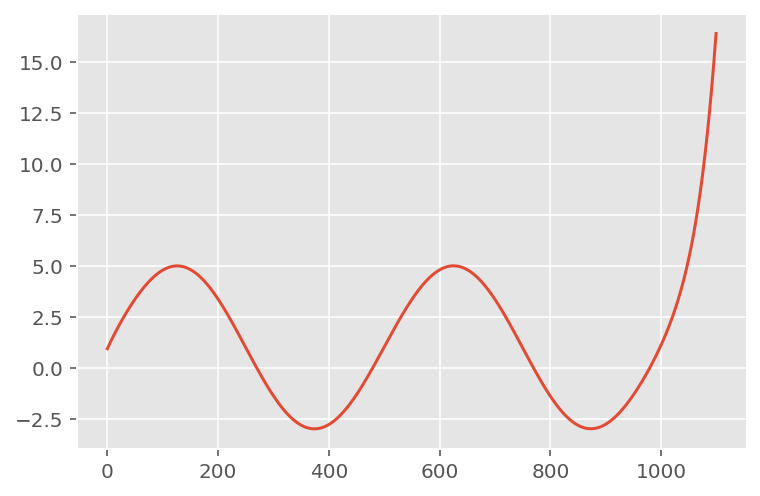

In [22]:
model = make_pipeline(PolynomialFeatures(10), Ridge())
model.fit(np.arange(timeSeries.size).reshape(-1,1),timeSeries)
mpl.pyplot.plot(model.predict(np.arange(timeSeries.size+100).reshape(-1,1)))

# MLP Regressor

Too many MLP layers for the amount of training samples. This explains some of the weird behaviours of the final model when extrapolating the time series.

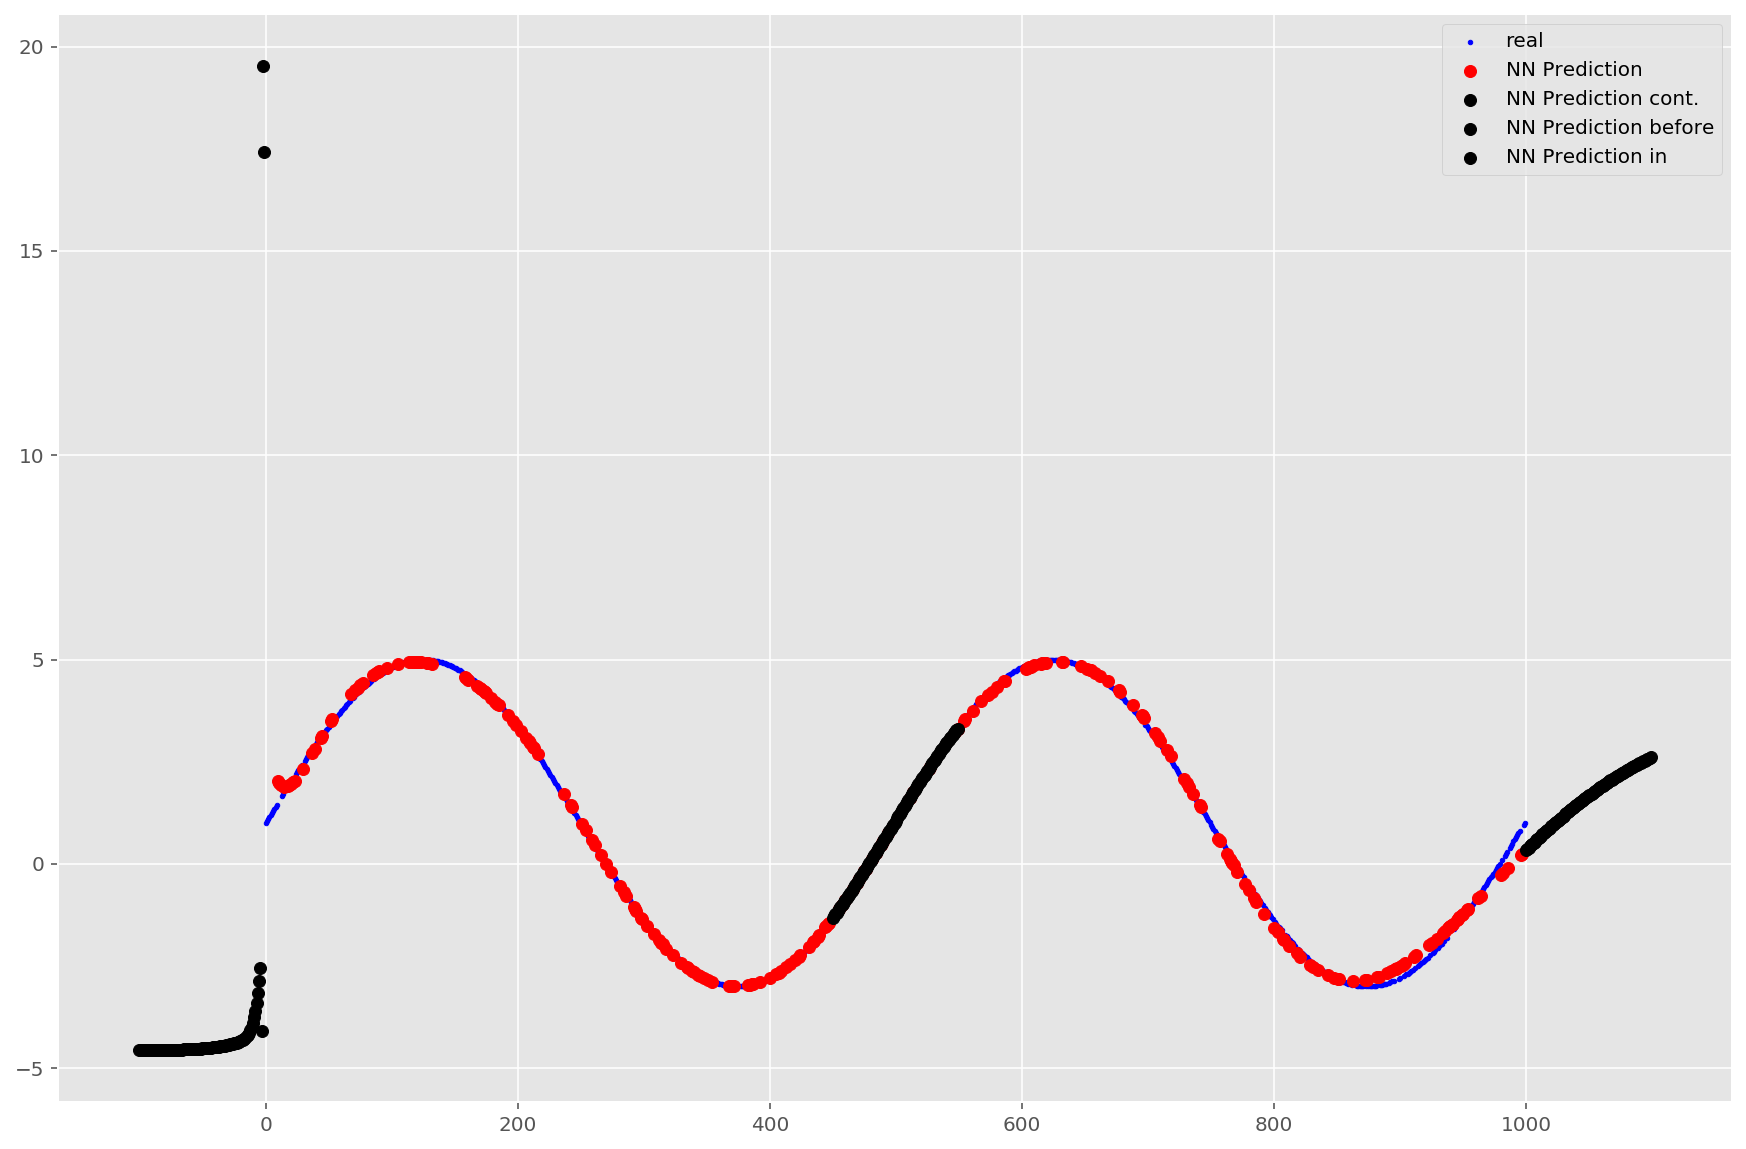

array([0.3389081 , 0.36881657, 0.39862205, 0.42832217, 0.4579146 ,
       0.48739708, 0.51676738, 0.54602336, 0.57516291, 0.60418399,
       0.63308461, 0.66186283, 0.69051677, 0.7190446 , 0.74744454,
       0.77571488, 0.80385393, 0.83186008, 0.85973176, 0.88746746,
       0.9150657 , 0.94252507, 0.9698442 , 0.99702177, 1.0240565 ,
       1.05094718, 1.07769263, 1.10429171, 1.13074335, 1.1570465 ,
       1.18320017, 1.20920341, 1.23505532, 1.26075504, 1.28630174,
       1.31169466, 1.33693305, 1.36201622, 1.38694352, 1.41171433,
       1.43632809, 1.46078425, 1.48508232, 1.50922185, 1.5332024 ,
       1.55702359, 1.58068508, 1.60418655, 1.62752772, 1.65070835,
       1.67372821, 1.69658714, 1.71928499, 1.74182165, 1.76419702,
       1.78641107, 1.80846376, 1.83035511, 1.85208515, 1.87365394,
       1.89506158, 1.9163082 , 1.93739393, 1.95831894, 1.97908345,
       1.99968767, 2.02013185, 2.04041626, 2.0605412 , 2.080507  ,
       2.10031398, 2.11996251, 2.13945298, 2.1587858 , 2.17796

In [44]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

#x = np.arange(timeSeries.size).reshape(-1,1)
#y = timeSeries

x, test_x, y, test_y = train_test_split(np.arange(timeSeries.size).reshape(-1,1), timeSeries, test_size=0.25)

nn = MLPRegressor(hidden_layer_sizes = (100, 25, 100), activation = 'tanh', solver = 'lbfgs', max_iter=20000)

n = nn.fit(x, y)

y_hat = nn.predict(test_x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x,y,s=5,c='b', marker='o', label='real')
ax1.scatter(test_x,y_hat, c='r', label='NN Prediction')
x_cont =np.arange(timeSeries.size,timeSeries.size+100).reshape(-1,1)
x_in =np.arange(450,550).reshape(-1,1)
x_before =np.arange(-100,0).reshape(-1,1)
ax1.scatter(x_cont, nn.predict(x_cont), c='black',label='NN Prediction cont.')
ax1.scatter(x_before, nn.predict(x_before), c='black',label='NN Prediction before')
ax1.scatter(x_in, nn.predict(x_in), c='black',label='NN Prediction in')


plt.legend()
plt.show()

nn.predict(x_cont)


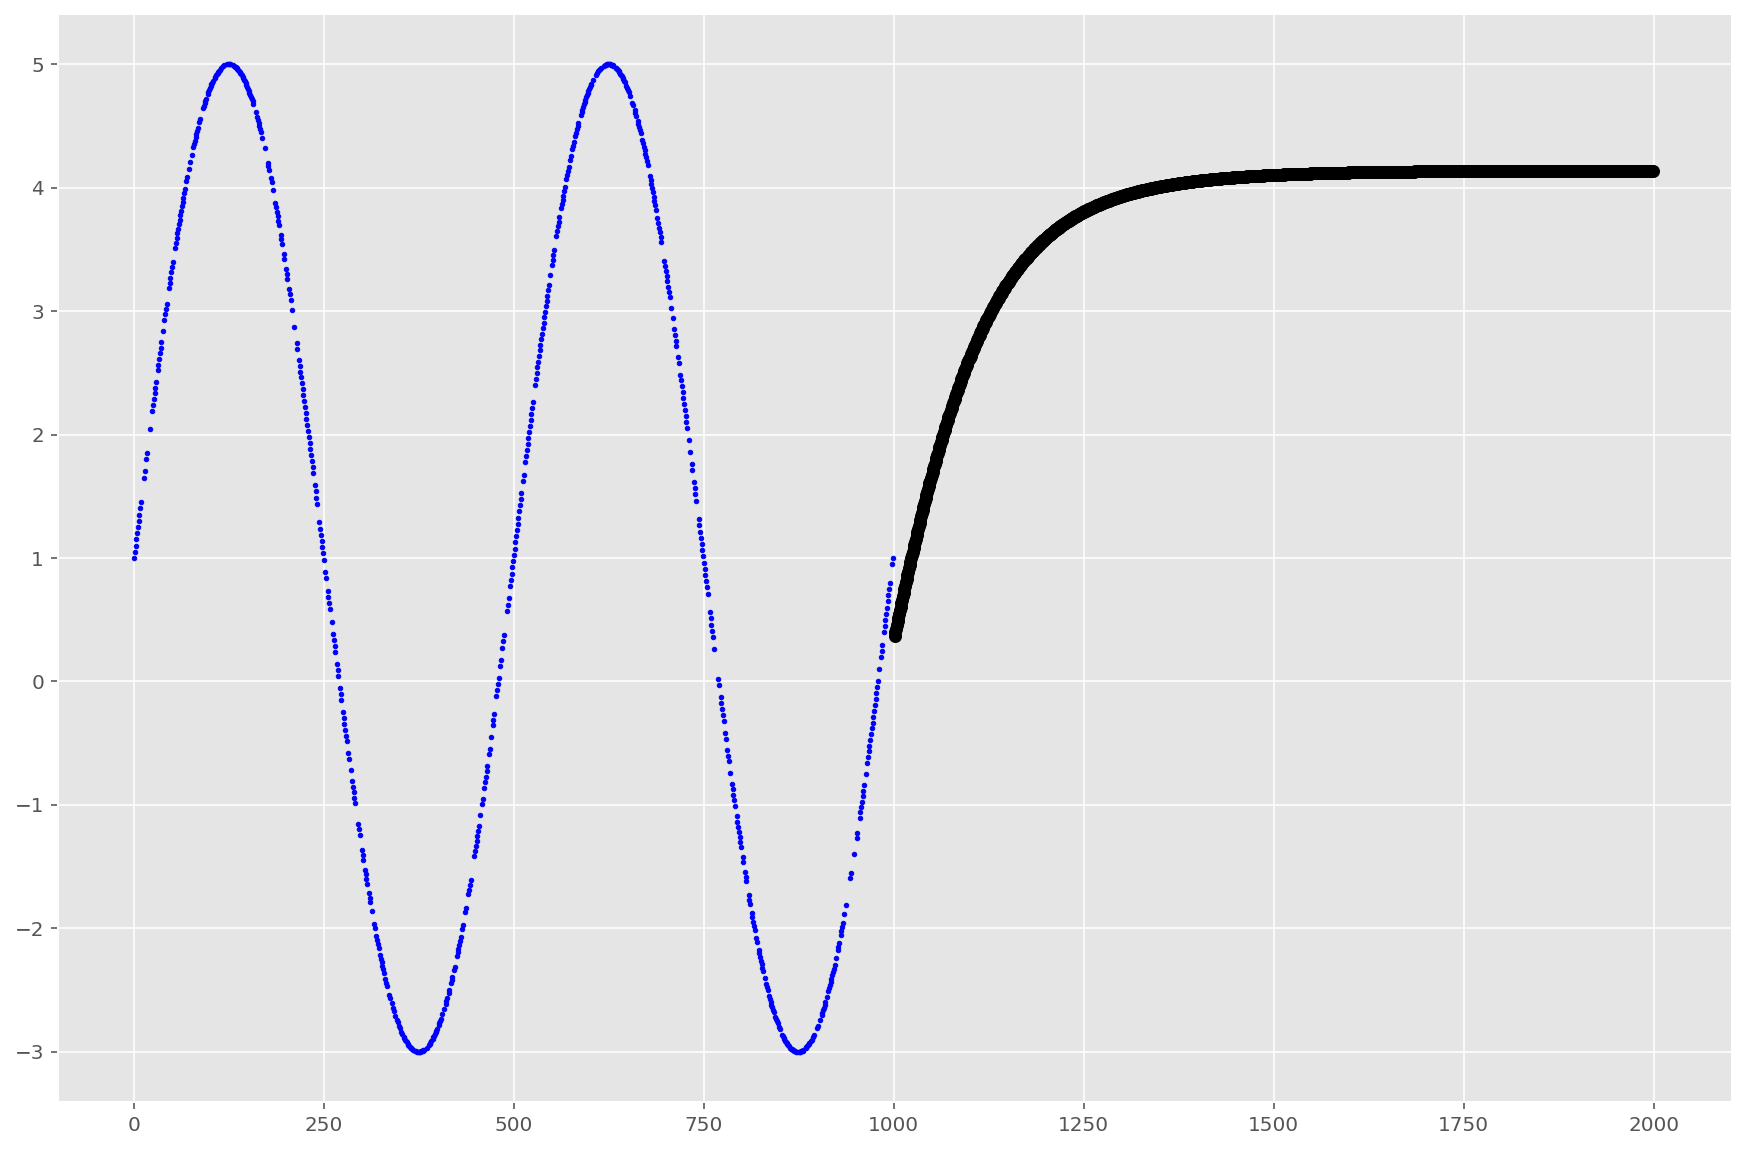

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x,y,s=5,c='b', marker='o', label='real')
x_cont =np.arange(1001,2000).reshape(-1,1)
ax1.scatter(x_cont, nn.predict(x_cont), c='black', marker='o',label='NN Prediction cont.')